In [19]:
import pandas as pd

In [21]:
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('../dataset/IEA Global EV Data 2024.csv')

In [31]:
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [33]:
#informações gerais
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


,year,value
count,12654.000000,1.265400e+04
mean,2019.822112,4.273742e+05
std,5.476494,6.860498e+06
min,2010.000000,1.200000e-06
25%,2016.000000,2.000000e+00
50%,2020.000000,1.300000e+02
75%,2022.000000,5.500000e+03
max,2035.000000,4.400000e+08


In [35]:
#verificar valores duplicados
df.duplicated().sum() #caso aparecer o 0, significa que não tem linhas iguais

0

In [37]:
#verificar valores vazios por coluna
df.isnull().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

In [39]:
df['mode'].unique() #o campo mode nesse caso, faz mudar a sintaxe, pois o nome mode já é algo do Python (uma palavra reservada) então tem que mudar a forma de escrever.

array(['Cars', 'EV', 'Buses', 'Vans', 'Trucks'], dtype=object)

In [41]:
df.unit.unique() #mesma "função" do código acima, mas pode ser direto com o campo chamado unit (coluna que possui unidades diferentes)

array(['percent', 'Vehicles', 'charging points', 'GWh',
       'Milion barrels per day', 'Oil displacement, million lge'],
      dtype=object)

In [43]:
df_vehicles = df.loc[df['unit'] == 'Vehicles']

In [45]:
df_vehicles.head()

,region,category,parameter,mode,powertrain,year,unit,value
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.0
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.0
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.0
5,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.0
8,Australia,Historical,EV stock,Cars,PHEV,2012,Vehicles,80.0


In [47]:
df_vehicles['unit'].unique()

array(['Vehicles'], dtype=object)

In [49]:
df_vehicles['mode'].value_counts()

mode
Cars      2975
Buses     1485
Vans      1449
Trucks     933
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1d2540573b0>,
 [Text(0.2236940701869681, 1.0770148387850504, 'Cars'),
  Text(-1.059475175108288, -0.29582486935560853, 'Buses'),
  Text(0.05351735479744666, -1.0986973617586802, 'Vans'),
  Text(1.0005952318392295, -0.45695643339447445, 'Trucks')],
 [Text(0.12201494737470986, 0.5874626393373001, '43.5%'),
  Text(-0.5778955500590661, -0.1613590196485137, '21.7%'),
  Text(0.0291912844349709, -0.5992894700501892, '21.2%'),
  Text(0.5457792173668524, -0.2492489636697133, '13.6%')])

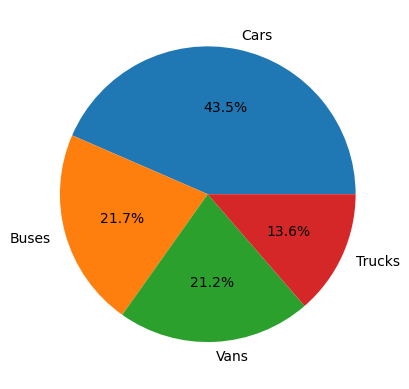

In [41]:
labels = df_vehicles['mode'].unique()
contagem = df_vehicles['mode'].value_counts() #é melhor (mais seguro) colocar o nome da coluna sempre entre [colchetes], para não dar problema, pois mode já existe no python.

plt.pie(contagem, labels = labels, autopct='%1.1f%%')
#plt.show()

In [51]:
df_vehicles['value'].dtype

dtype('float64')

In [49]:
df_vehicles.groupby('region')['value'].sum()

region
Australia               5.788320e+05
Austria                 8.719660e+05
Belgium                 1.687010e+06
Brazil                  2.649470e+05
Bulgaria                4.623000e+03
Canada                  2.416440e+06
Chile                   1.445800e+04
China                   1.148052e+09
Colombia                1.602300e+04
Costa Rica              2.763100e+04
Croatia                 7.557000e+03
Cyprus                  2.260000e+03
Czech Republic          3.430000e+04
Denmark                 1.102561e+06
EU27                    3.324256e+07
Estonia                 4.585000e+03
Europe                  5.937754e+08
Finland                 7.427230e+05
France                  6.787772e+06
Germany                 1.020111e+07
Greece                  1.053560e+05
Hungary                 4.203500e+04
Iceland                 1.897660e+05
India                   6.341878e+07
Ireland                 8.857000e+04
Israel                  4.821870e+05
Italy                   1.86004

In [53]:
df_vehicles.groupby('region')['value'].sum()

region
Australia               5.788320e+05
Austria                 8.719660e+05
Belgium                 1.687010e+06
Brazil                  2.649470e+05
Bulgaria                4.623000e+03
Canada                  2.416440e+06
Chile                   1.445800e+04
China                   1.148052e+09
Colombia                1.602300e+04
Costa Rica              2.763100e+04
Croatia                 7.557000e+03
Cyprus                  2.260000e+03
Czech Republic          3.430000e+04
Denmark                 1.102561e+06
EU27                    3.324256e+07
Estonia                 4.585000e+03
Europe                  5.937754e+08
Finland                 7.427230e+05
France                  6.787772e+06
Germany                 1.020111e+07
Greece                  1.053560e+05
Hungary                 4.203500e+04
Iceland                 1.897660e+05
India                   6.341878e+07
Ireland                 8.857000e+04
Israel                  4.821870e+05
Italy                   1.86004

In [55]:
df_vehicles.groupby('region')['value'].sum()

region
Australia               5.788320e+05
Austria                 8.719660e+05
Belgium                 1.687010e+06
Brazil                  2.649470e+05
Bulgaria                4.623000e+03
Canada                  2.416440e+06
Chile                   1.445800e+04
China                   1.148052e+09
Colombia                1.602300e+04
Costa Rica              2.763100e+04
Croatia                 7.557000e+03
Cyprus                  2.260000e+03
Czech Republic          3.430000e+04
Denmark                 1.102561e+06
EU27                    3.324256e+07
Estonia                 4.585000e+03
Europe                  5.937754e+08
Finland                 7.427230e+05
France                  6.787772e+06
Germany                 1.020111e+07
Greece                  1.053560e+05
Hungary                 4.203500e+04
Iceland                 1.897660e+05
India                   6.341878e+07
Ireland                 8.857000e+04
Israel                  4.821870e+05
Italy                   1.86004

In [67]:
dictionary_vehicles = df_vehicles.groupby('region')['value'].sum()
dictionary_vehicles.keys() # .keys() é um metodo especifico para dicionarios

Index(['Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'EU27', 'Estonia', 'Europe', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania',
       'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
       'Poland', 'Portugal', 'Rest of the world', 'Romania', 'Seychelles',
       'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Turkiye', 'USA', 'United Arab Emirates',
       'United Kingdom', 'World'],
      dtype='object', name='region')

In [69]:
dictionary_vehicles.Australia

578832.0

In [85]:
sorted(dictionary_vehicles)

[338.0,
 2260.0,
 4585.0,
 4623.0,
 4687.0,
 6673.0,
 7557.0,
 13351.0,
 13363.0,
 14458.0,
 16023.0,
 16533.0,
 27631.0,
 34300.0,
 39488.0,
 42035.0,
 42100.0,
 52804.0,
 88570.0,
 105356.0,
 142591.0,
 189766.0,
 198338.0,
 264947.0,
 343287.0,
 371462.0,
 482187.00100000005,
 578832.0,
 674996.0,
 742723.0,
 871966.0,
 1102561.0,
 1165185.0,
 1403419.0,
 1687010.0,
 1860044.0,
 2416439.8000001907,
 2509214.0,
 2516838.0,
 3488004.4000000954,
 3603756.0,
 4793634.0,
 6283637.0,
 6787772.0,
 10201107.0,
 33242559.0,
 63418776.400000095,
 308996799.9000001,
 411280117.1999998,
 593775414.0,
 1148051600.0,
 2520120081.0]

In [59]:
df_vehicles_region = pd.DataFrame(dictionary_vehicles.items(), columns=['Regions','Value'])

In [123]:
df_vehicles_region.sort_values(by=['Value'])

,Regions,Value
40,Seychelles,3.380000e+02
11,Cyprus,2.260000e+03
15,Estonia,4.585000e+03
4,Bulgaria,4.623000e+03
29,Latvia,4.687000e+03
30,Lithuania,6.673000e+03
10,Croatia,7.557000e+03
41,Slovakia,1.335100e+04
42,Slovenia,1.336300e+04
6,Chile,1.445800e+04


In [71]:
df_vehicles_region.sort_values(by=['Value'], ascending = False).head(10) #adicionado o .head(10) no final ara apresentar só os 10 "primeiros" maiores.

,Regions,Value
51,World,2.520120e+09
7,China,1.148052e+09
16,Europe,5.937754e+08
48,USA,4.112801e+08
38,Rest of the world,3.089968e+08
23,India,6.341878e+07
14,EU27,3.324256e+07
19,Germany,1.020111e+07
18,France,6.787772e+06
50,United Kingdom,6.283637e+06


In [87]:
df_vehicles_region = pd.DataFrame(dictionary_vehicles.items(), columns=['Regions','Value'])

df_top_ten = df_vehicles_region.loc[(df_vehicles_region['Regions'] != 'World') &
                       (df_vehicles_region['Regions'] != 'Rest of the world')] \
                        .sort_values(by=['Value'], ascending = False) \
                        .head(10)  # o contrabarra --> \ serve para deixar quebrar a linha

print(df_top_ten)


           Regions         Value
7            China  1.148052e+09
16          Europe  5.937754e+08
48             USA  4.112801e+08
23           India  6.341878e+07
14            EU27  3.324256e+07
19         Germany  1.020111e+07
18          France  6.787772e+06
50  United Kingdom  6.283637e+06
35          Norway  4.793634e+06
27           Japan  3.603756e+06


<BarContainer object of 10 artists>

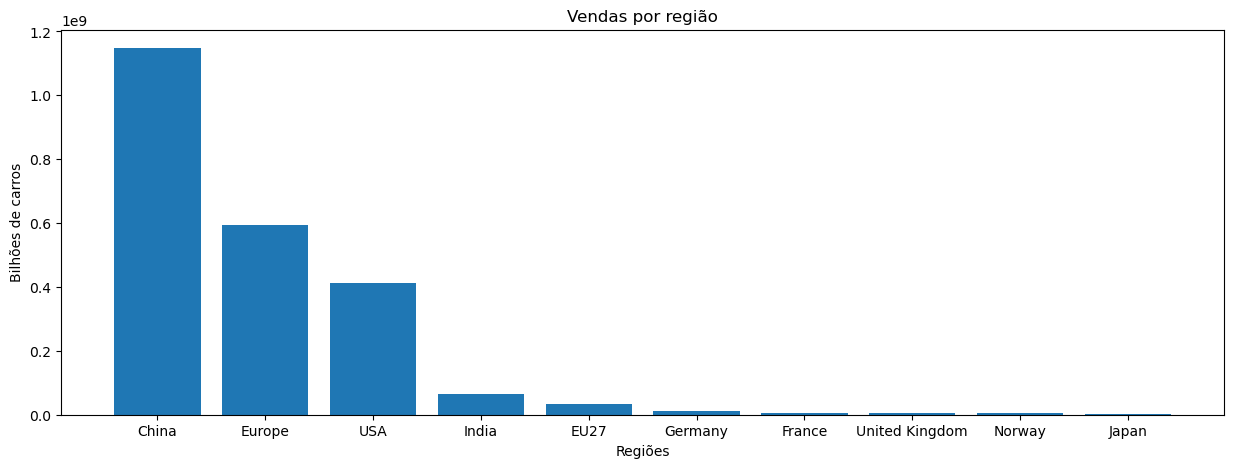

In [93]:
df_top_ten

x = df_top_ten['Regions']
y = df_top_ten['Value']

plt.figure(figsize = (15, 5))
plt.title('Vendas por região')
plt.xlabel('Regiões')
plt.ylabel('Bilhões de carros')
plt.bar(x,y)


In [95]:
df_vehicles['powertrain'].unique()

array(['BEV', 'PHEV', 'FCEV'], dtype=object)

In [105]:
df_BEV = df_vehicles.loc[df_vehicles['powertrain'] == 'BEV']
df_PHEV = df_vehicles.loc[df_vehicles['powertrain'] == 'PHEV']
df_FCEV = df_vehicles.loc[df_vehicles['powertrain'] == 'FCEV']

BEV = df_BEV.groupby('year')['value'].sum()
PHEV = df_PHEV.groupby('year')['value'].sum()
FCEV = df_FCEV.groupby('year')['value'].sum()

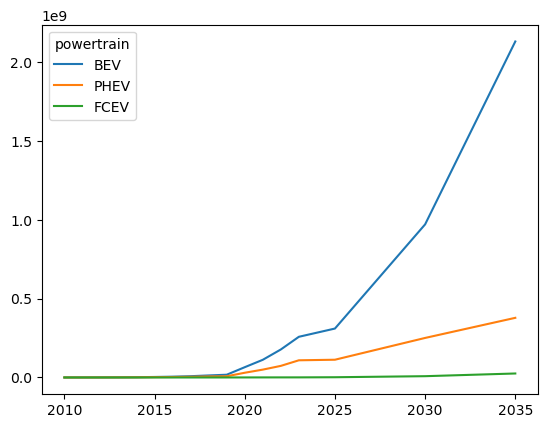

In [107]:
plt.plot(BEV, label = 'BEV')
plt.plot(PHEV, label = 'PHEV')
plt.plot(FCEV, label = 'FCEV')
plt.legend(title = 'powertrain')